# The Computational Image of the City: Landmarks - Light-Mode
Four scores are here computed to extract computation landmarks: structural, visual, pragmatic.
Currently, the user has to provide the building shapefile, collected independently. The height is the only necessary field, plus two datasets containing respectively information about cultural/historical landmarks (e.g. position of listed important buildings) and land-use.

In [45]:
import osmnx as ox, matplotlib.cm as cm, pandas as pd, numpy as np, geopandas as gpd
import matplotlib.pyplot as plt
from importlib import reload
import functools
%matplotlib inline

pd.set_option('precision', 5)
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [46]:
import landmarks_functions as lf
import utilities as uf

In [48]:
reload(lf)

<module 'landmarks_functions' from 'C:\\Users\\g_filo01\\sciebo\\scripts\\Image of the City\\landmarks_functions.py'>

## Loading the data

## specify coordinates and methods for obtaining buildings' footprints directories


'city_buildings' is the large buiding datasets. Landmarks are extracted from buildings that are within the 'area_to_clip'
(the case study area). Some buildings around the case study area have to be included in the analys in order to compute measures
correctly, without mistakenly exalting building located along the edges of the case-study area. A 800 distance from the case-study area is used to include such other buildings. The parameter can be changed accordingly to the purposes.

w'height_field 'and 'base_field' are to be used to indicate the maximum and the base height field of the buildings, in the original shapefile. When the second is not provided, the base is automatically set to 0. Height is necessary to perform the landmark extraction. If such a feature is not at disposal, set "height" to false.

Buildings smaller then 200 square meters are kept out of the analysis, as well as buildings whose height is lower than 1mt.


### IMPORTANT: If the user has got already a dataset with buildingID and height (obstructions) and its relative subset that refers to the area of study (buildings), set the variable "optionA" to True, otherwise to False, if you have just a standard buildings dataset to process.
### If you have no shapefile at all and would like to obtain data from OSM, set download as True
### set the EPSG and CRS of your case-study area

In [39]:
# define city name, eps and crs
# city_name = 'Muenster'
# epsg = 25832
# crs = {'init': 'epsg:25832', 'no_defs': True}

# city_name = 'Boston'
# epsg = 26986 
# crs = {'init': 'epsg:26986', 'no_defs': True}

city_name = 'London'
epsg = 27700
crs = {'init': 'epsg:27700', 'no_defs': True}

In [ ]:
folder_ouptut ='Outputs/'+city_name+'/'
optionA = False # if you have all files: buildings + obstructions
optionB = True
download = False
light_mode = False
if light_mod

In [6]:
gdf = ox.footprints.footprints_from_place(place='Piedmont, California, USA')

In [69]:
G4 = ox.graph_from_address(address='350 5th Ave, New York, NY', 
                              distance=1000, distance_type='network', network_type='drive')

ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?format=json&limit=1&q=350%205th%20Ave,%20New%20York,%20NY (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002716F8E7908>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [68]:
city_buildings = ox.footprints.footprints_from_place(place='Muenster', footprint_type = 'building')

ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?format=json&limit=1&dedupe=0&polygon_geojson=1&q=Muenster (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002716F8CE5C0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [61]:
download = True
if download == True:
    place = 'Muenster'
    rdium
    city_buildings = ox.footprints.footprints_from_place(place='Muenster')
    for column in city_buildings.columns: 
        if column.startswith('building:use:'):
            city_buildings.loc[pd.notnull(city_buildings[column]), 'land_use'] = column[13:]
            
    city_buildings.to_crs(epsg=epsg)
    
# buildings, obstructions = lf.select_buildings(city_buildings, area_to_clip, height_field ='max', base_field = None, 
#                                                       distance_obstructions = 800)

ReadTimeout: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=30)

In [63]:
for column in city_buildings.columns: 
    if column.startswith('building:use:'):
        city_buildings.loc[pd.notnull(city_buildings[column]), 'land_use'] = column[13:]

In [64]:
city_buildings['land_use'].unique()

array([nan, 'infrastructure', 'gastronomy', 'religion', 'retail',
       'education', 'sport', 'office', 'residential', 'tourism', 'social',
       'craft', 'culture', 'parking'], dtype=object)

In [26]:
city_buildings['building:use'].unique()

array([nan, 'industrial', 'gastronomy', 'residential', 'retail', 'stable'],
      dtype=object)

In [31]:
cf['land_use'] = None
cf.loc[pd.notnull(cf['building:use:agriculture']), 'land_use'] = 'agriculture'

In [59]:
cf.land_use.unique()

array([None, 'agriculture'], dtype=object)

In [34]:
for column in city_buildings.columns: 
    if column.startswith('building:use:'):
        cf.loc[pd.notnull(cf[column]), 'land_use'] = column[13:]

    


accommodation
administration
agriculture
craft
culture
education
gastronomy
healthcare
infrastructure
logistics
office
parking
religion
residential
retail
social
sport
tourism


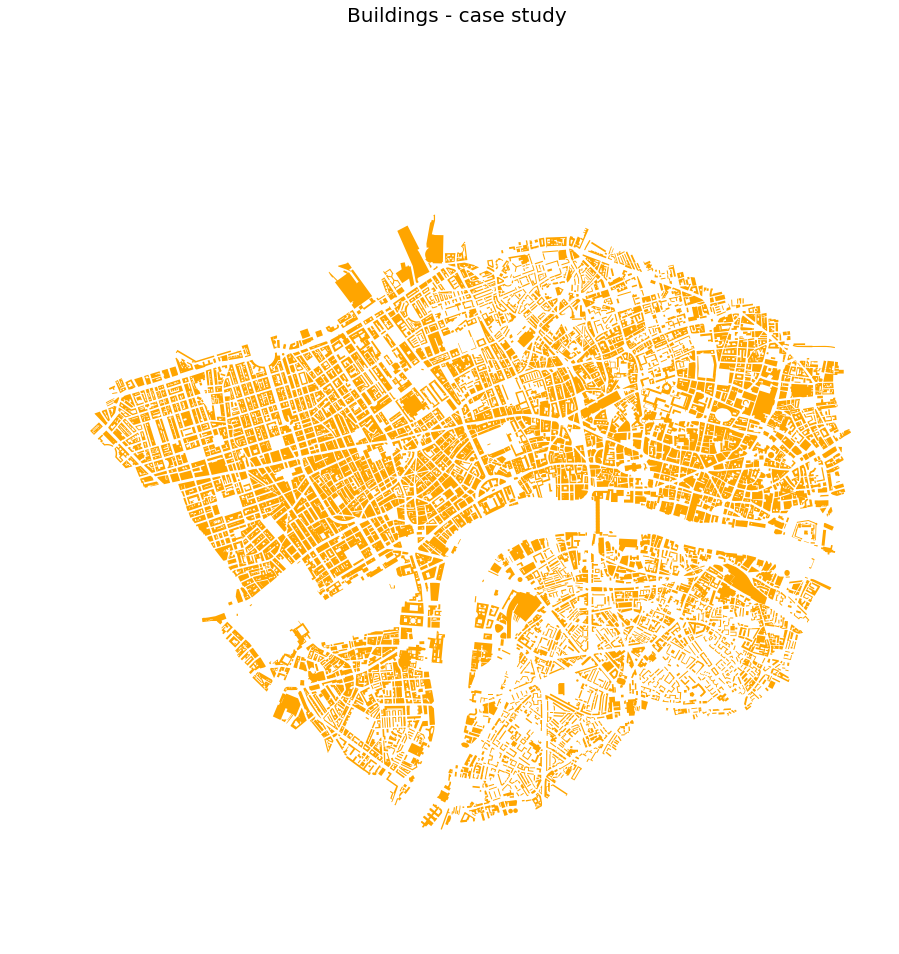

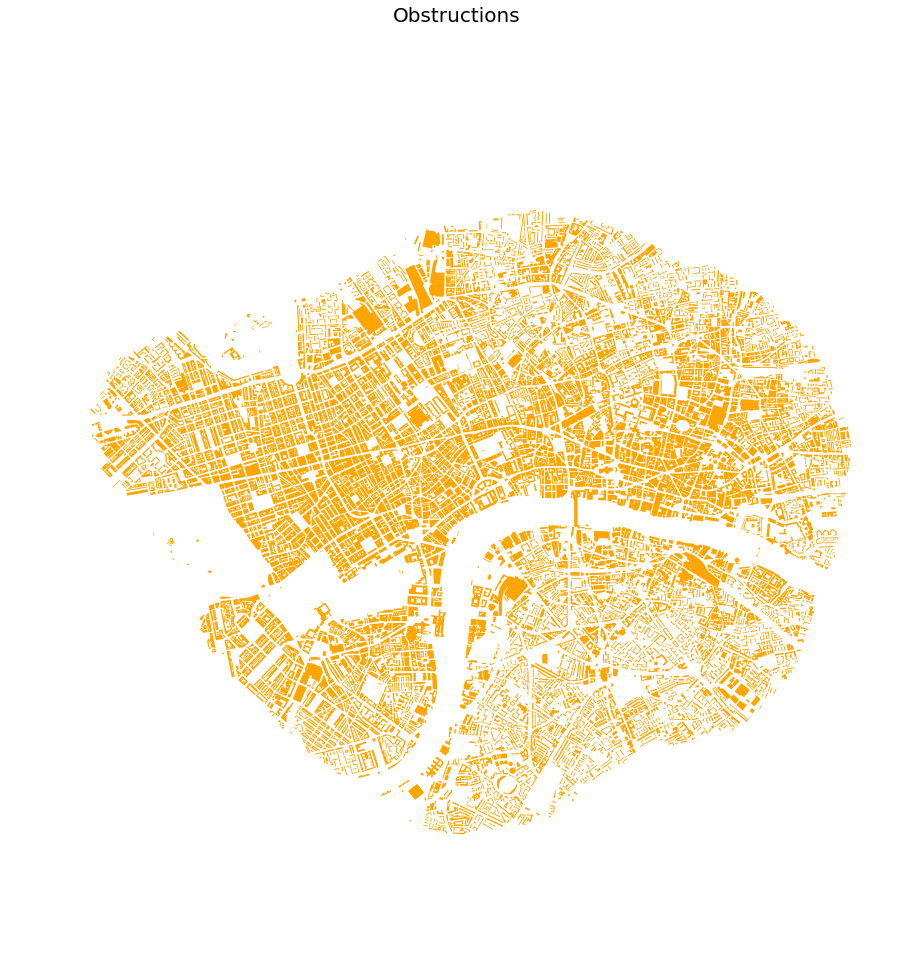

In [90]:
# visualising
uf.plot_polygons(buildings, title = 'Buildings - case study', bb = False, f =15)
uf.plot_polygons(obstructions, title = 'Obstructions', bb = False, f =15)

## 1 - Structural component

In [31]:
# reading the street network and passing it in the function to compute the structural score
streets = gpd.read_file("Outputs/"+city_name+"/large_network/"+city_name+"_paths.shp")

"""
computes:
- distance from the road
- number of adjacent buildings 
* area was already computed
** computes also façade area, a measure included in the visibility score
"""

# The 'buffer' parameter indicates distance within the algorithms look for neighbouring buildings
buildings = lf.structural_properties(buildings, obstructions, streets, buffer = 150)

Wall time: 4min 5s


In [8]:
if light_mode == False
#  compute 2d advance visibility (a sort of visibility buffer around the building - maximum radium is 2000 mt)
buildings = lf.advance_visibility(buildings, obstructions, distance = 300)

progress: 99 %Wall time: 1d 5h 29min 53s


## 2 - Visual component

In [9]:
# saving a temporary file that will be used for constructing the sightlines
buildings.to_file(driver='ESRI Shapefile', filename = "Outputs/tmp/"+city_name+"/"+city_name+"_buildings_missing.shp")

In [ ]:
# leave the notebook and run the script sight_lines.py within ArcGis Pro (should work in ArcScene too)

In [21]:
sight_lines = gpd.read_file("Outputs/"+city_name+"/"+city_name+"_sightlines.shp")
sight_lines.head()

Shape_Leng  Visible  buildingID  \
0     989.365        1       27131   
1     938.480        1       27131   
2     935.026        1       27131   
3     950.623        1       27131   
4     980.518        1       27131   

                                            geometry  nodeID  
0  LINESTRING (528249.0162000023 182138.709600003...      10  
1  LINESTRING (528249.0162000023 182138.709600003...      10  
2  LINESTRING (528249.0162000023 182138.709600003...      10  
3  LINESTRING (528249.0162000023 182138.709600003...      10  
4  LINESTRING (528249.0162000023 182138.709600003...      10

In [58]:
# computing the visibility score
buildings = lf.visibility(buildings, sight_lines)

## 3 - Cultural component

In [63]:
"""
Loading historical polygons and computing cultural score.
The  'Grade' column is used on the basis on an existing rank (data-dependent).
If no classification is available from the data source, run the function without the 'score' argument.
"""

if city_name == 'Boston':
    directoryBoston = "C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/historic_landmarks.shp"
    cultural_elements = (gpd.read_file(directoryBoston)).to_crs(epsg=epsg)
    buildings = ic.cultural_meaning(buildings, cultural_elements)

if city_name == 'London':
    directoryLondon = "C:/Users/g_filo01/sciebo/GIS Data/London/Historic_England/Listed_building_greaterLondon.shp"
    cultural_elements = (gpd.read_file(directoryLondon)).to_crs(epsg=epsg)
    cultural_elements['Grade'] = cultural_elements['Grade'].map( lambda x: 3 if x == 'I' else 2 if x == 'II*' else 1 
                                       if x == 'II' else 0)
    buildings = lf.cultural_meaning(buildings, cultural_elements, score = 'Grade')

Wall time: 19.1 s


## 4 - Pragmatic component

Here different land-use datasets are loaded to assign land-use categorisation to the *buildings* GDF. At the moment this part is city-dependent. The pragmatic score is computed on the large area (*obstructions* GDF) to take into account adjacent buildings also along the edge of the case-study area. The method here used to assign land-use descriptors to the main GDF is based on geometries intersection. From polygons GDFs: Tha land-use of the building *x* in the external GDF is assigned to the building *y* from the *buildings* GDF, only when the intersection area cover 60% of *y*. From points GDFs: simple intersection.

## London

In [11]:
# polygons
"""
Important buildings, functional sites, public tranport stations shapefiles from Ordnance Survey are loaded.
OpenStreetMap building shapefile is loaded too before a point file with Point of Interest in London (Ordnance Survey)
"""
imp = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/OS OpenMap Local/TQ_ImportantBuilding2.shp').to_crs(epsg = epsg)
fs = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/OS OpenMap Local/TQ_FunctionalSite.shp').to_crs(epsg = epsg)
stations = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/OS OpenMap Local/TQ_RailwayStation.shp').to_crs(epsg = epsg)
osm_buildings = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/OSM/buildings.shp').to_crs(epsg = epsg)
osm_buildings = osm_buildings[osm_buildings['type'] != None]

# points
POI = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/London/OS OpenMap Local/London_POI.shp').to_crs(epsg = epsg)

In [ ]:
# provide 3 lists:  names of the GDFs loaded; the field where land-use information is contained; name of the new_columns

gdf = [imp, fs, stations, osm_buildings] 
columns_lu = ['BUILDGTHEM', 'SITETHEME', 'CLASSIFICA', 'type']
new_columns = ['land_use_1', 'land_use_2', 'land_use_3', 'land_use_4']

# extracting land-use information from all the GDFs
for i, p in enumerate(gdf): obstructions = lf.land_use_from_polygons(obstructions, p, new_columns[i], columns_lu[i])

In [13]:
# same procedure for all the Point-file loaded
gdf = [POI]
columns_lu = ['main']
new_columns = ['land_use_5']

for i, p in enumerate(gdf): obstructions = lf.land_use_from_points(obstructions, p, new_columns[i], columns_lu[i])

Wall time: 22.6 s


In [14]:
"""
Please establish a hierarchy. In this case, for example, 'land_use_4' is used only when all the others land-use columns
are empty. 'land_use_1' is supposed to have priority over the others (when filled).
"""

obstructions['land_use_1'][obstructions['land_use_1'].isnull()] = obstructions['land_use_2']
obstructions['land_use_1'][obstructions['land_use_1'].isnull()] = obstructions['land_use_3']
obstructions['land_use_1'][obstructions['land_use_1'].isnull()] = obstructions['land_use_5']
obstructions['land_use_1'][obstructions['land_use_1'].isnull()] = obstructions['land_use_4']
obstructions.head()

area  base  buildingID  height  \
0  208.221     0       30162   3.180   
1  942.013     0       30163  12.210   
2  331.740     0       30164  12.270   
3 1637.525     0       30165  27.820   
4 1441.718     0       30166  11.590   

                                            geometry           land_use_1  \
0  POLYGON ((529891.79 183628.2200000007, 529898....            Transport   
1  POLYGON ((529908.4400000004 183173.1600000001,...                 None   
2  POLYGON ((529866.5 183238.3499999996, 529847.9...  Commercial services   
3  POLYGON ((527543.29 182478.7400000002, 527460....          Attractions   
4  POLYGON ((527005.8700000001 182333.7400000002,...            Education   

  land_use_2 land_use_3 land_use_4            land_use_5  
0       None       None       None             Transport  
1       None       None       None                  None  
2       None       None       None   Commercial services  
3       None       None       None           Attractions  
4  Education       None       None  Education and health

In [15]:
"""
This function reclassify the land-use descriptors in pre-defined categories (see the script landmark_functions.py for more 
details). It usually works for OSM data. Edit the source for including other land-use descriptors. Please indicate the main
land_use field.
"""
obstructions = lf.classify_lu(obstructions, 'land_use_1')
obstructions['land_use'] = obstructions['land_use_1']
obstructions.drop(['land_use_1', 'land_use_2', 'land_use_3', 'land_use_4', 'land_use_5'], axis = 1, inplace = True)

## Boston

In [ ]:
# Loading polygons data: parcel from Boston Open Data Portal, buildings from OpenStreetMap

parcels = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/Parcels_2016/parcels.shp').to_crs(epsg = epsg)
osm_buildings = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/OSM/buildings.shp').to_crs(epsg = epsg)
osm_buildings = osm_buildings[osm_buildings['type'] != None]

In [ ]:
# provide 3 lists:  names of the GDFs loaded; the fields where land-use information is contained; name of the new_columns

gdf = [parcels, osm_buildings]
columns_lu = ['LU', 'type']
new_columns = ['land_use_1', 'land_use_2']
for i, p in enumerate(gdf): obstructions = lf.land_use_from_polygons(obstructions, p, new_columns[i], columns_lu[i])
obstructions['land_use_1'][obstructions['land_use_1'].isnull()] = obstructions['land_use_2']
obstructions = lf.classsify_lu(obstructions, 'land_use_1')

#### Other data

In [ ]:
# libraries, universities, schools and police stations

schools = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/schools.shp').to_crs(epsg=epsg)
uni = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/universities.shp').to_crs(epsg=epsg)
p_schools = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/p_schools.shp').to_crs(epsg=epsg)
lib = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/libraries.shp').to_crs(epsg=epsg)
pools = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/pools.shp').to_crs(epsg=epsg)
police = gpd.read_file('C:/Users/g_filo01/sciebo/GIS Data/Boston/Buildings/Data_sources/other/police.shp').to_crs(epsg=epsg)

In [ ]:
"""
Land-use-specific datasets are also used.
When the 'land_use_1' field in the 'obstructions' GDF is still empty or only filled with 'residential' or 'commercial' values,
the land-use-specific GDFs are used to fill in the field (when geometries intersect).
"""

df_list = [schools, p_schools, libraries, universities, pools, police]
classification = ['education', 'education', 'library', 'university', 'sport', 'emergency_service']
list_ignore = ['residential', 'commercial', None]

index_geometry = obstructions.columns.get_loc("geometry")+1 
index_land_use = obstructions.columns.get_loc("land_use_1")+1

# iterate through the specif GDF and replace land-use information

for i, t in enumerate(df_list):
    sindex = t.sindex # spatial index

    for row in obstructions.itertuples():
        g = row[index_geometry] # geometry
        possible_matches_index = list(sindex.intersection(g.bounds))
        possible_matches = t.iloc[possible_matches_index]
        precise_matches = possible_matches[possible_matches.intersects(g)]
                
        if (len(precise_matches)==0): continue # buildings don't intersect
        if (row[index_land_use] not in list_ignore): continue # if there's already a land-use value continue
        else: obstructions.set_value(row[0], 'land_use_1', classification[i])

In [ ]:
obstructions['land_use'] = obstructions['land_use_1']
obstructions.drop(['land_use_1', 'land_use_2', 'land_use_3', 'land_use_4', 'land_use_5'], axis = 1, inplace = True)
obstrucions.head()

### Pragmatic meaning computation

In [17]:
"""
Computing the pragmatic score and assigning it to 'buildings_gdf'.
The pragmatic component is computed on the 'obstructions' GDF as the measure considers adjacent buildings' land_use
The 'buffer' parameter indicates the extension of the area that is used to compute the score of a building, on the basis of
its land-use's frequency, in an area of 'buffer' meters around it.
"""

obstructions = lf.pragmatic_meaning(obstructions, buffer = 200)
buildings = pd.merge(buildings, obstructions[['prag', 'land_use', 'buildingID']], how = 'left', 
                     left_on = "buildingID", right_on = "buildingID")

Wall time: 1min 11s


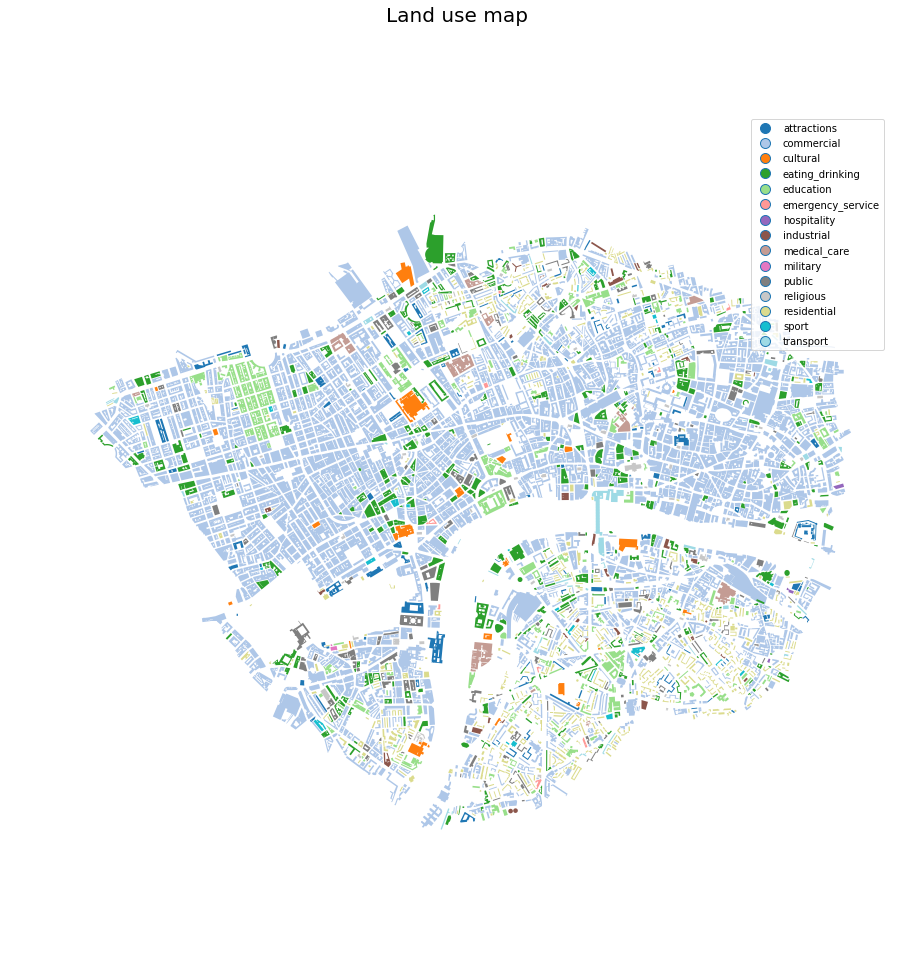

In [160]:
# visualising
uf.plot_polygons(buildings, column = 'land_use', cmap = 'tab20', title = 'Land use', bb = False, f = 15, legend = True)

# 5 - Final scores

In [40]:
buildings = gpd.read_file('Outputs/London/intermediate/London_landmarks.shp').to_crs(epsg=epsg)

In [52]:
# define weights

# global landmarkness components weights
g_cW = {'vScore': 0.50, 'sScore' : 0.30, 'cScore': 0.20, 'pScore': 0.10}
# global landmarkness indexes weights, cScore and pScore have only 1 index each
g_iW = {'vis': 0.50, 'fac': 0.30, 'height': 0.20, 'area': 30, 'a_vis':0.30, 'neigh': 0.20 , 'road': 0.20}

# global landmarkness components weights
l_cW = {'vScore': 0.25, 'sScore' : 0.35, 'cScore':0.10 , 'pScore': 0.30}
# global landmarkness indexes weights, cScore and pScore have only 1 index each
l_iW = {'vis': 0.50, 'fac': 0.30, 'height': 0.20, 'area': 40, 'a_vis': 0.00, 'neigh': 0.30 , 'road': 0.30}

In [50]:
reload(lf)

<module 'landmarks_functions' from 'C:\\Users\\g_filo01\\sciebo\\scripts\\Image of the City\\landmarks_functions.py'>

In [53]:
# Global and Local Score (1500 mt area)

buildings = lf.compute_scores(buildings, g_cW, g_iW)
buildings = lf.local_scores(buildings, l_cW, l_iW, 1500)
buildings.crs = crs
buildings.head()

a_vis     area  base  buildingID      fac  height  neigh  r_height  road  \
0  306.556 2358.223     0       34770 1212.036  17.725     31    17.725     4   
1    0.000  495.862     0       34772  134.555   4.130     17     4.130    18   
2 1202.339 1911.551     0       34777 1590.033  20.214     47    20.214     4   
3    0.000  603.798     0       34774  505.340  14.920     18    14.920    14   
4    0.000  994.908     0       34778  615.547  10.433     38    10.433     4   

     dist  ...  prag     land_use  prag_sc  vScore_l  sScore_l  lScore_sc  \
0 315.948  ... 0.354  residential    0.359     0.000     0.000      0.198   
1 200.010  ... 0.406  residential    0.411     0.000     0.000      0.145   
2 315.422  ... 0.952       public    0.964     0.000     0.000      0.428   
3 200.010  ... 0.933    transport    0.945     0.000     0.000      0.351   
4 368.601  ... 0.339  residential    0.343     0.000     0.000      0.140   

                                            geometry  vis_sc  cScore  pScore  
0  POLYGON ((527333.5000004283 181964.699998368, ...   0.017   0.000   0.359  
1  POLYGON ((529596.4300004677 182602.4199981857,...   0.000   0.000   0.411  
2  POLYGON ((527228.5000004265 182011.5499983752,...   0.017   0.000   0.964  
3  POLYGON ((529646.2200004687 182659.1699981845,...   0.000   0.019   0.945  
4  POLYGON ((527217.8300004263 182069.8399983773,...   0.026   0.000   0.343  

[5 rows x 41 columns]

In [57]:
buildings.gScore_sc.max()

1.0

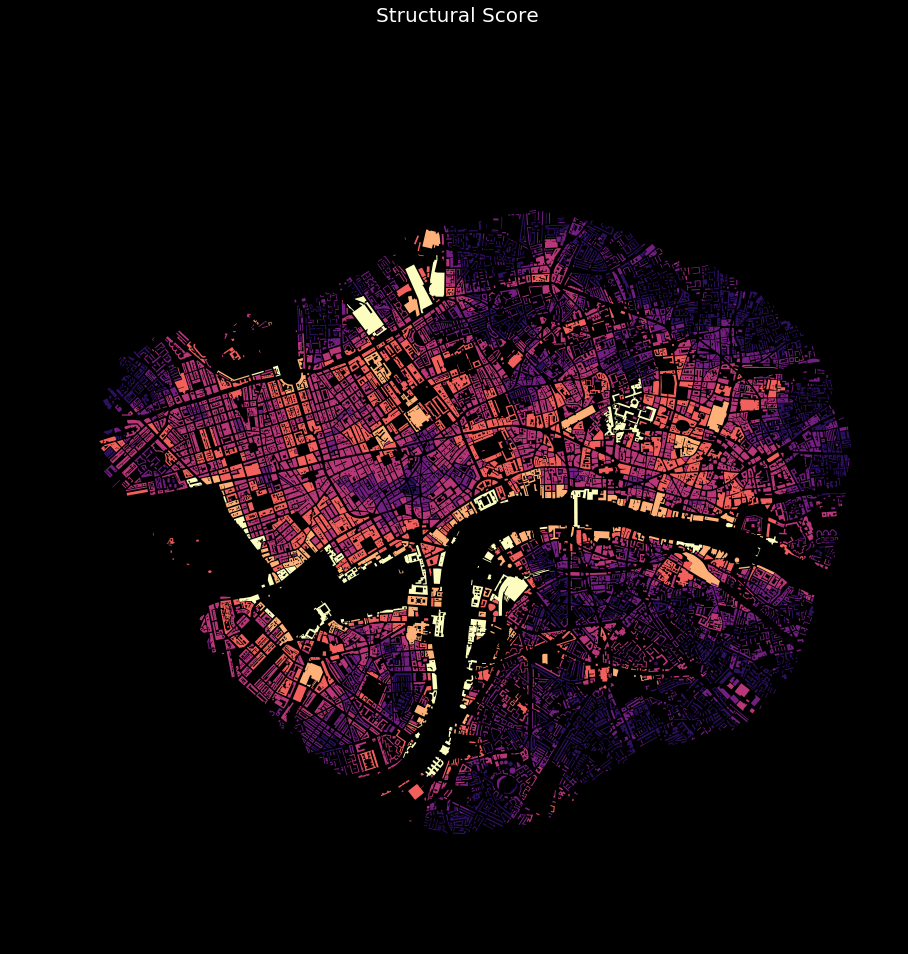

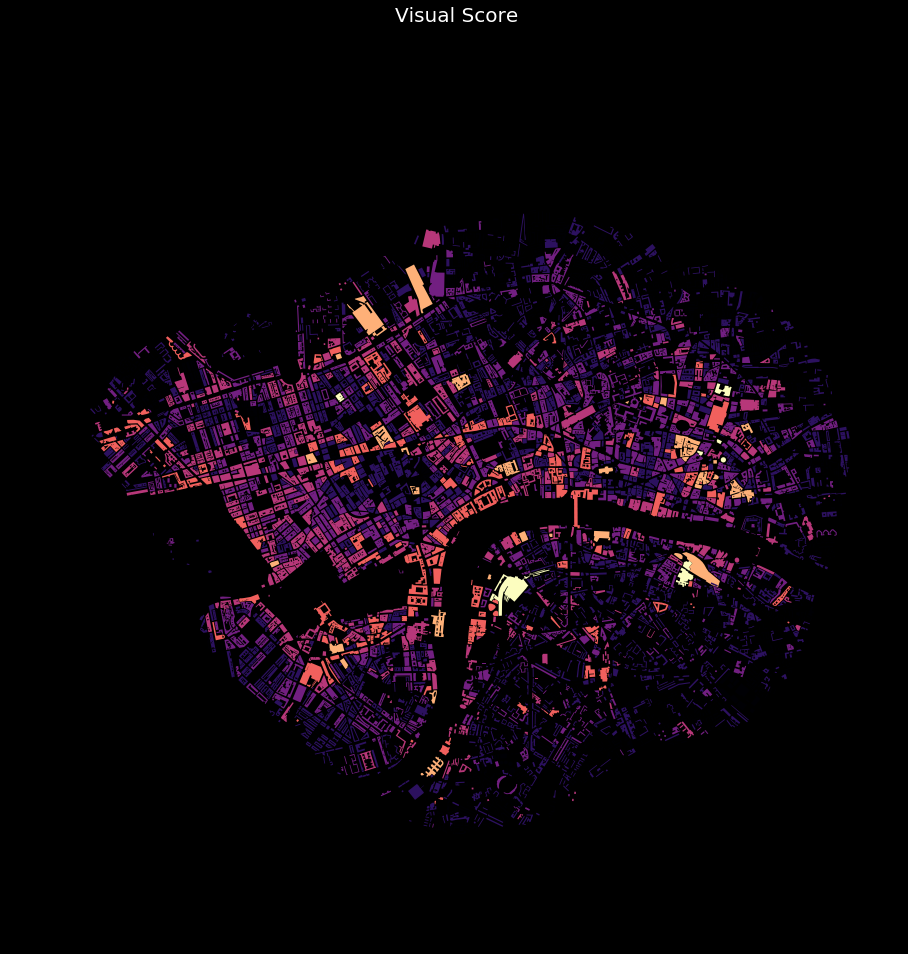

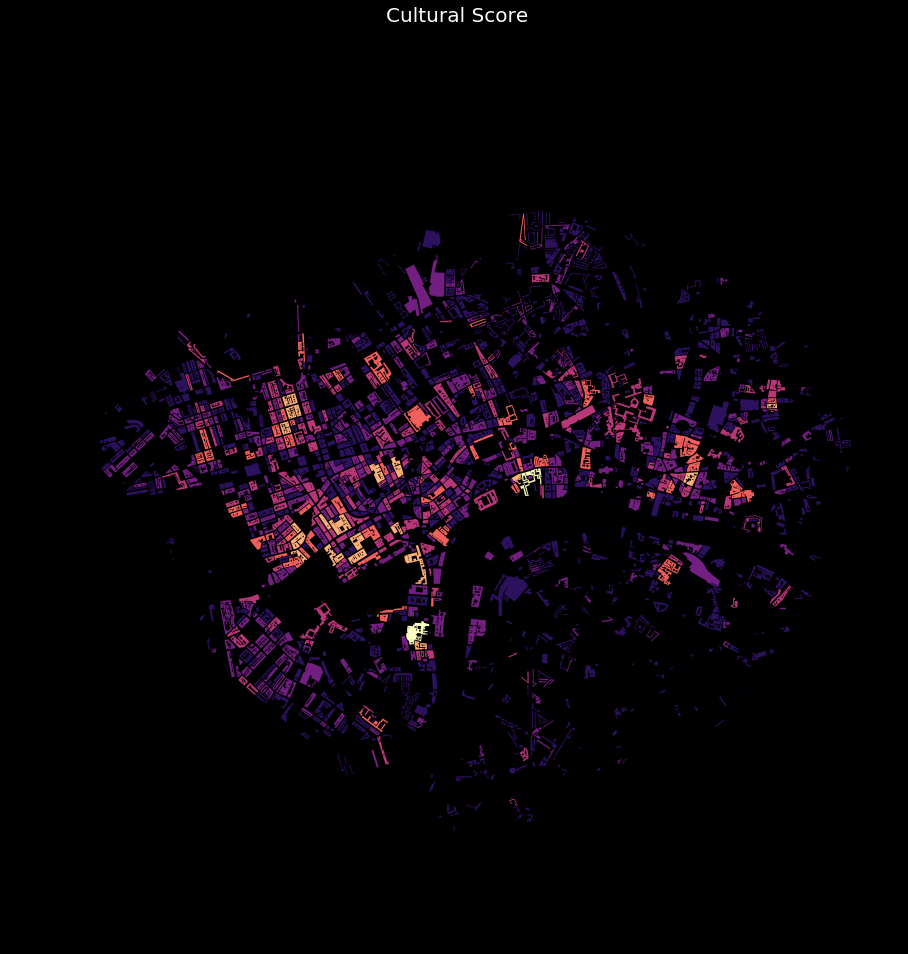

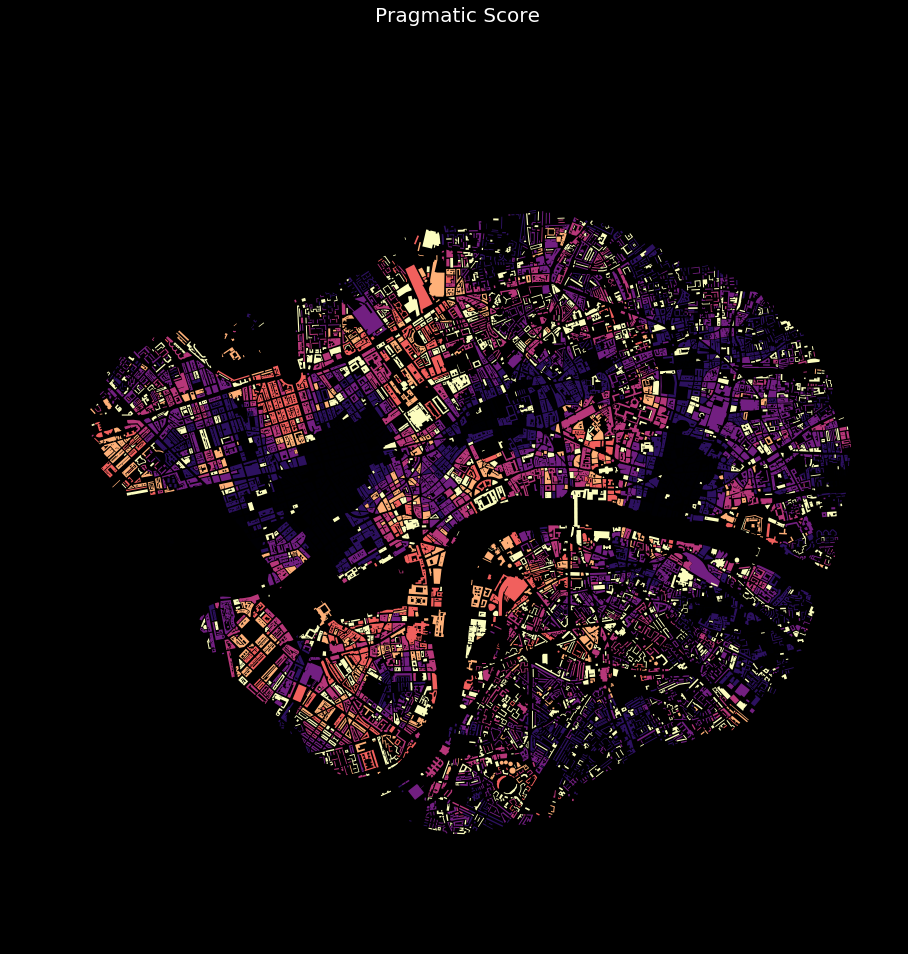

In [10]:
# visualising the four componets' maps, the color bar can be activated adding: cb = True

uf.plot_polygons(buildings, classes = 7, column = 'sScore_sc', title = 'Structural Score', 
                 scheme = 'fisher_jenks', cmap = 'magma', bb = True, cb = False, f = 15)
uf.plot_polygons(buildings, classes = 7, column = 'vScore_sc', title = 'Visual Score', 
                 scheme = 'fisher_jenks', cmap = 'magma', bb = True, cb = False, f = 15)
uf.plot_polygons(buildings, classes = 7, column = 'cult_sc', title = 'Cultural Score', 
                scheme = 'fisher_jenks',cmap = 'magma', bb = True, cb = False, f = 15)
uf.plot_polygons(buildings, classes = 7, column = 'prag_sc', title = 'Pragmatic Score', 
                scheme = 'fisher_jenks', cmap = 'magma', bb = True, cb = False, f = 15)

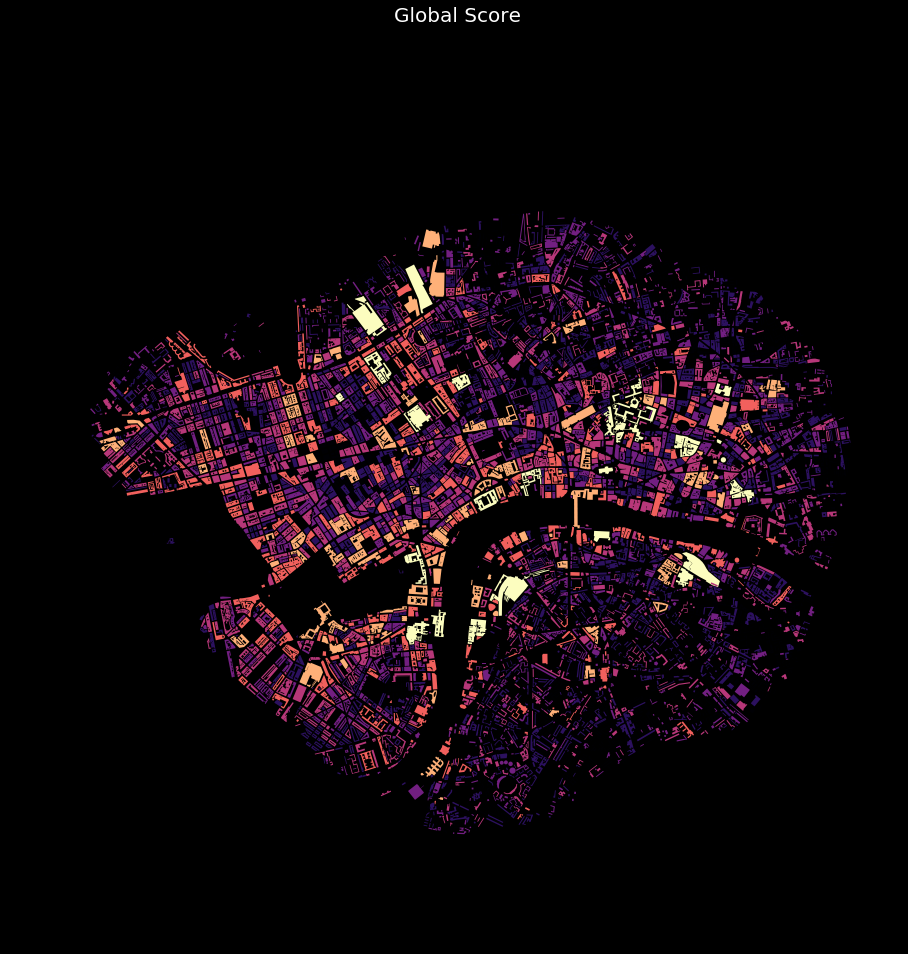

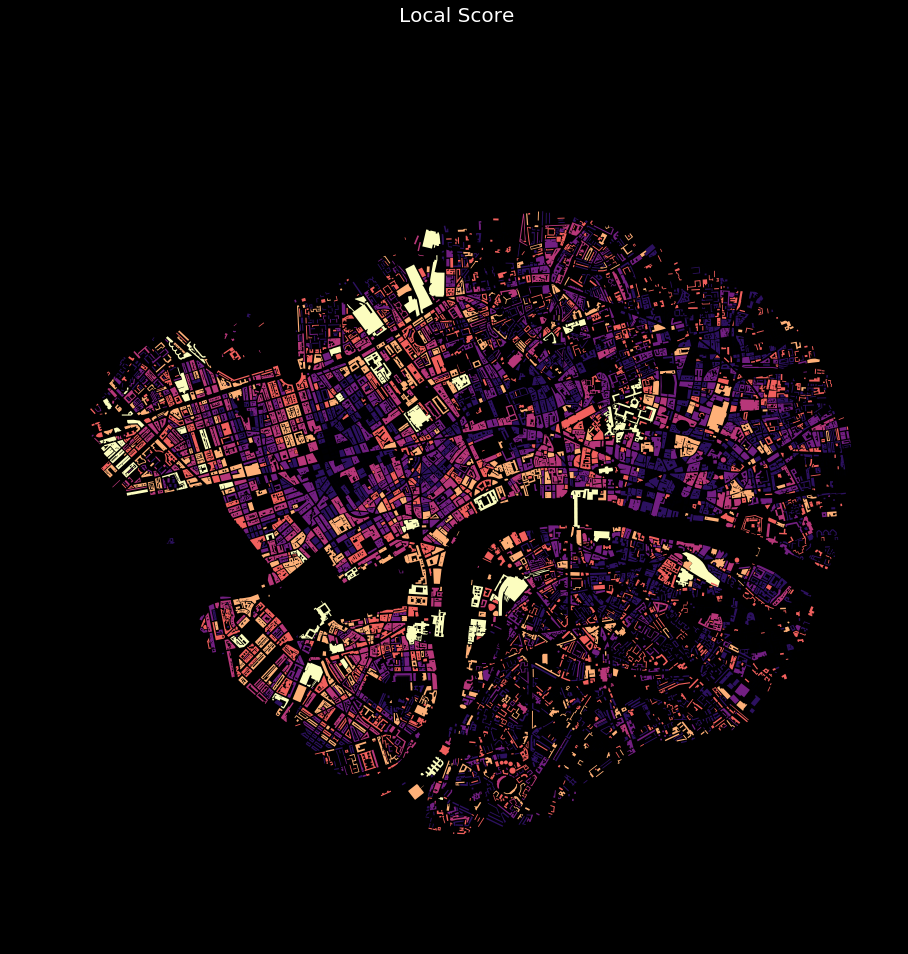

In [54]:
uf.plot_polygons(buildings, classes =7, column = 'gScore_sc', title = 'Global Score', 
                scheme = 'fisher_jenks', cmap = 'magma', bb = True, cb = False, f = 15)
uf.plot_polygons(buildings, classes =7, column = 'lScore_sc', title = 'Local Score', 
                scheme = 'fisher_jenks', cmap = 'magma', bb = True, cb = False, f = 15)

In [58]:
buildings.to_file('Outputs/'+city_name+'/intermediate/'+city_name+'_landmarks_noADV.shp', driver='ESRI Shapefile')